# MFE 230P: ASSIGNMENT II
**SUGGESTED SOLUTION** \\ Mustafa S Eisa

# 1. Factor Modeling

Suppose we have obtained a covariance matrix $\Sigma \in \mathbb{R}^{p \times p}$. We seek to approximate it with a factor model of the form $\hat{\Sigma} = \lambda \mathbb{I}_p + FF^\top$, where $F$ is a $p \times k$ matrix, or "factor loadings," $\lambda>0$ is the "idiosyncratic noise" variance, and $\mathbb{I}_p$ a $p \times p$ identity matrix. The stochastic model that corresponds to this is

$$y = Ff + \sigma e$$

where $y \in \mathbb{R}^p$ is a (random) vector of centered observations, $f
\in \mathbb{R}^{k}$ is a random variable with zero mean and $e \in
\mathbb{R}^p$ is a noise vector with identity covariance matrix, $\sigma =
\sqrt{\lambda}$ is the standard deviation of the idiosyncratic noise component
$\sigma e$. To approximate $F,\lambda$, we seek to solve

$$\min_{F,\lambda} \: \left\|\Sigma - \lambda \mathbb{I}_p - FF^\top\right\|_F \text{ subject to } \lambda>0$$

where $\|\cdot\|_F$ stands for the Frobenius norm of its matrix argument. In
this exercise, we develop an EVD-based solution to this problem.

### A. Regularized Covariance Approximation

Assume $\lambda$ is known and less than $\lambda_k$ (the $k^{th}$ largest
eigenvalue of the covariance matrix $\Sigma$). Express the eigenvalues
of $\Sigma - \lambda \mathbb{I}_p$ in terms of the eigenvalues of $\Sigma$. Use your
result to express an optimal $F$ as a function of $\lambda$, which we'll denote
$F(\lambda)$. (In other words: you are asked to solve for $F$, with fixed
$\lambda$.)

### SOLUTION.


Suppose $\Sigma$ has an eigenvalue decomposition given by $VDV^\top$, where $D = \mathbf{diag}(\lambda_1, \lambda_2, \dots, \lambda_p)$, each column $v_i$ of $V$ is an eigenvector of $\Sigma$ corresponding to $\lambda_i$. Then we have

$$(\Sigma - \lambda \mathbb{I}_p)v_i = (\lambda_i - \lambda) v_i$$

So $v_i$ is also an eigenvector of matrix $\Sigma - \lambda \mathbb{I}_p$ and its eigenvalue is $\lambda_i - \lambda$. Therefore, $\Sigma - \lambda \mathbb{I}_p$ can be decomposed as $V \hat{D} V^\top$, where $\hat{D} = \mathbf{diag}(\lambda_1 - \lambda, \lambda_2 - \lambda, \dots, \lambda_p - \lambda)$. It can then be shown that an optimal $F$ as a
function of $\lambda$ is given by

$$F(\lambda) = V \hat{D}^{1/2} \mathbb{I}_{p \times k}$$

where $\mathbb{I}_{p \times k}$ is the matrix $\mathbb{I}_p$ truncated to $k$ columns.

### B. Analyzing the Residual Covariance

Show that the error $E(\lambda) = \left\|\Sigma - \lambda \mathbb{I}_p -
F(\lambda)F(\lambda)^\top\right\|_F$, with $F(\lambda)$ being the matrix you found in the
previous part, can be written as

$$E(\lambda)^2 = \sum_{i=k+1}^p (\lambda_i - \lambda)^2$$

Find a closed-form expression for the optimal $\lambda$ that minimizes
$E(\lambda)$. (Express optimal $\lambda$ in terms of $\lambda_i$.) 

### SOLUTION.

From the previous question, we have

\begin{align}
    E(\lambda)^2 &= \left\|\Sigma - \lambda \mathbb{I}_p - F(\lambda) F(\lambda)^\top \right\|_F^2 \\
       & = \left\|V\hat{D}V^\top  - V\hat{D}^{1/2}\mathbb{I}_{p\times k} \mathbb{I}_{p\times
        k}^\top \hat{D}^{1/2}V^\top \right\|_F^2 \\ 
       & = \left\| \hat{D} - \hat{D}^{1/2}\mathbb{I}_{p\times k}\mathbb{I}^\top _{p \times k} \hat{D}^{1/2}\right\|_F^2 \\
       & = \sum_{i=k+1}^p (\lambda_i - \lambda)^2.
\end{align}

By first order conditions, the error $E(\lambda)^2$ is minimized when

$$2\sum_{i=k+1}^p (\lambda_i - \lambda) = 0 \implies \lambda = \frac{\sum_{i=k+1}^p \lambda_i}{p-k}$$

### C. Low-Rank Covariance Approximation

Another way to approximate the covariance matrix $\Sigma$ is through
low-rank approximation. A rank-$k$ approximation to $\Sigma$ is of the form
$\tilde{\Sigma} = FF^\top$. Assume that we wish to estimate the risk (as measured
by variance) involved in a specific portfolio, which is described by a $x \in
\mathbb{R}^p$. Show that compared to using the original $\Sigma$, the
rank-$k$ approximation $\tilde{\Sigma}$ under-estimates the variance of the
portfolio. How about using the regularized factor model from part A? Briefly
comment.

### SOLUTION.

Using the fact that $\Sigma = VDV^\top $ and $\tilde{\Sigma} = D^{1/2}\mathbb{I}_{p\times k}\mathbb{I}^\top _{p \times k}D^{1/2}$, for any portfolio $x$, we have

\begin{align}
    x^\top \Sigma x - x^\top \tilde{\Sigma} x & = x^\top \left(\sum_{i=1}^p \lambda_i v_i v_i^\top \right)x - x^\top \left(\sum_{i=1}^k \lambda_i v_i v_i^\top \right)x \\
        & = x^\top  \left(\sum_{i=k+1}^p \lambda_i v_i v_i^\top \right)x \ge 0
\end{align}

So the rank-$k$ approximation from part B always underestimates the risk for any portfolio. Turning to the regularized factor model from part A, which we will refer to as $\hat{\Sigma} = \lambda\mathbb{I} + FF^\top$ we have

\begin{align}
    x^\top \left(\Sigma - \hat{\Sigma}\right) x & = x^\top  \left(\sum_{i=k+1}^p (\lambda_i-\lambda) v_i v_i^\top \right)x
\end{align}

which suggests that the error can be "compensated" by $\lambda$. Notice the previous expression is not necessarily less than zero (depends on $\lambda$). Furthemore, we can see that 

$$\lambda_i \ge 0, \lambda = \text{mean}(\lambda_i) \implies \left|(\lambda_i - \lambda)(x^\top v_i)^2 \right| \le \left|\lambda_i(x^\top v_i)^2 \right| \implies \left|x^\top  \Sigma x - x^\top  \hat{\Sigma} x \right| \le \left|x^\top  \Sigma x - x^\top  \tilde{\Sigma} x\right|$$

Therefore, we can say that the regularized factor model necessarily provides a better approximation than simple rank-$k$ approximation.

# 2. Generalized Low-Rank Models

### A. PCA and Convexity

**True or False:** _The pca problem_

$$\min_{Z} \|A - Z\|^2_F \text{ subject to } \mathbf{rank}(Z) \leq k$$



_is a convex optimization problem, where $0 < k < \min\{m,n\}$._ Justify your answer.

### SOLUTION.

False. The problem is not convex because the $\mathbf{rank}(\cdot)$ operator is not convex. Therefore the feasible region, and hence the problem itself, is not convex. To see this, we proceed with the following simple counterexample

$$\mathbf{rank}\left(.5 \begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix} + .5 \begin{bmatrix}
0 & 0 \\
0 & 1
\end{bmatrix}\right) = 2 > 1 = .5 \cdot \mathbf{rank}\left(\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}\right) + .5 \cdot \mathbf{rank}\left(\begin{bmatrix}
0 & 0 \\
0 & 1
\end{bmatrix}\right)$$

demonstrating that $\mathbf{rank}(\cdot)$ clearly violates Jensen's inequality.

### B. Nuclear Norm Denoising

Recall that, for any symmetric positive definite matrix $A \in \mathbb{R}^{n\times n}$,

$$P \begin{bmatrix}
\mathbb{I}_k & \mathbf{0} \\
\mathbf{0} & \mathbf{0}
\end{bmatrix}
D P^\top = \arg\min_{Z} \frac{1}{2}\|A - Z\|^2_F \text{ subject to } \mathbf{rank}(Z) \leq k$$

where $0 < k < n$, $A = PD P^\top$ via EVD, and $\mathbb{I}_k$ is the $k\times k$ identity matrix. Practitioners (such as those at Netflix) often work with a close, "relaxed" version of the above problem known as **Nuclear Norm Denoising**:

$$\min_{Z} \frac{1}{2} \|A - Z\|^2_F + \lambda\|Z\|_*$$

in which $\lambda > 0$ serves a similar purpose to $k$ in the former problem. 

Express the solution to the nuclear norm denoising problem in closed form. **Hint:** Both the Forbenius norm $\|\cdot\|_F$ and the nuclear norm $\|\cdot\|_*$ are invariant to orthogonal rotation. Furthermore, for $\lambda >0$,

$$(y - \lambda)_+ = \arg\min_x \frac{(y - x)^2}{2} + \lambda |x|$$

where $x$ and $y$ are scalars.

### SOLUTION.

Since the Forbenius norm and nuclear norm are invariant to orthogonal rotation, we let the left and right eigenvectors of $Z$ be those of $A$. Therefore, we have 

\begin{align}
\min_{Z} \frac{1}{2}\left\|A - Z\right\|^2_F + \lambda\left\|Z\right\|_* &= \min_{\hat{D}} \frac{1}{2}\left\|PD P^\top - P\hat{D} P^\top\right\|^2_F + \lambda\left\|\hat{D}\right\|_* \\
&= \min_{\hat{D}} \frac{1}{2}\left\|P(D - \hat{D}) P^\top\right\|^2_F + \lambda\left\|\hat{D}\right\|_* \\
&= \min_{\hat{D}} \frac{1}{2}\left\|D - \hat{D}\right\|^2_F + \lambda\left\|\hat{D}\right\|_* \\
&= \min_{\hat{D}} \sum_{i=1}^{n} \frac{1}{2} \left(D_{ii} - \hat{D}_{ii}\right)^2 + \lambda\left|\hat{D}_{ii}\right|
\end{align}

where $\hat{D}$ is the matrix containing singular values of $Z$ on the diagonal. Since each term in the sum is independent of all other terms, the objective can be decoupled into $n$ independent, univariate problems of the form

$$ \min_{\hat{D}_{ii}}\left\{\frac{1}{2} \left(D_{ii} - \hat{D}_{ii}\right)^2 + \lambda\left|\hat{D}_{ii}\right|\right\}$$

Then, using the second hint provided, we have that the solution $\hat{D}_{ii} = \left(D_{ii} - \lambda\right)_+$. Thus, the solution of the nuclear norm denoising problem is $P\left(D - \lambda\right)_+P^\top$.

### C. Robust PCA and Convexity

**True or False:** _The robust pca problem_

$$\min_{Z, S} \|Z\|_* + \lambda\|S\|_1 \text{ subject to } A = Z + S$$

_is a convex optimization problem, where $\lambda > 0$._ Justify your answer.

### SOLUTION.

True. Both terms in the objective are convex (since all norms are convex) and therefore their sum is also conex. Furthermore, the constraint is linear in both decision variables. Therefore, the problem is a convex problem.

### D. Robust PCA as a Generalized Low-Rank Model

Recall from lecture that a **generalized low-rank model** is defined by the problem

$$\min_{X,Y} \mathcal{L}\left(X, Y\right) + \ell_x\left(X\right) + \ell_y\left(Y\right)$$

where $\mathcal{L}$ is bi-convex in $(X, Y)$ and $\ell$ is convex. Show that robust PCA can be formulated as a generalized low-rank model. _**Hint:** For any matrix $Z = XY^\top$, $\|Z\|_* = \frac{1}{2}\left( \|X\|^2_F + \|Y\|^2_F\right)$._

### SOLUTION.

We know the (constrained) robust PCA problem is

$$\min_{S, Z} \|Z\|_* + \lambda \|S\|_1 \text{ subject to } A = Z + S$$

where $\lambda > 0$. The linear constraint can be re-expressed as $S = A - Z$ and substituted back into the constrained problem to obtain an unconstrained formulation

$$\min_{Z} \|Z\|_* + \lambda \|A - Z\|_1$$

Without loss of generality, there exists at least one pair of matrices $(X,Y)$ such that $Z = XY^\top$ (for example, $(X,Y)$ can be obtained via SVD). Substituting this in for $Z$ and using the hint given in the prompt, we arrive at the generalized low-rank model

$$\min_{X, Y} \frac{1}{2} \left(\|X\|_F^2 + \|Y\|_F^2\right) + \lambda \left\|A - XY^\top\right\|_1$$

in which the convex regularizers $\ell_x(X) = \frac{1}{2} \|X\|_F^2$, $\ell_y(Y) = \frac{1}{2} \|Y\|_F^2$ and the loss $\mathcal{L}(X, Y) = \lambda \left\|A - XY^\top\right\|_1$ which is verifiably bi-convex in $(X, Y)$.

### E. Robust PCA Implementation

Write a `Python` implementation of robust PCA using the template provided in the following cell. The output of the function `robustPCA` should be both $Z$ and $S$ from problem C above.

You may not use any external packages with the exception of `cvxpy` and `numpy`.

### SOLUTION.

In [1]:
import cvxpy as cvx
import numpy as np

def robustPCA(A, lamb=1):
    """Performs robust PCA on a real n x p matrix A.
    The argument lamb > 0 represents penalty on ell_1 norm term of objective.
    
    Returns two n x p matrices: low-rank and sparse part.
    """

    S = cvx.Variable(*A.shape)
    
    objective = cvx.Minimize(
        cvx.norm(A - S, "nuc") + lamb*cvx.norm(S, 1)
    )
    
    pstar = cvx.Problem(objective).solve()
    Z = A - S.value
    
    return Z, S.value

### F. A Robust Factor Model

Practitioners and academics alike often hypothesize that market returns are driven by a small number of [latent factors](http://www.investopedia.com/terms/m/multifactor-model.asp) and that any asset's deviation from the market's performance is idiosyncratic; due perhaps to something that isn't related to the factors or the greater economy. Our goal in this exercise is to decompose returns into a latent, low-rank component $Z$ and a sparse "shocks" component $S$ using robust PCA.

Executing the next cell below will download a dataset containing two years (2014-15) of daily adjusted returns for 16 of the largest tech firms by market cap; firms that characterize the tech sector. The returns data will be stored in a variable `data`, a pandas dataframe object, in which the column headers are company tickers and the row index is the date.

Perform robust PCA on the daily returns for $\lambda \in \{.5, .25, .1\}$. For each choice of $\lambda$, plot the raw returns of the 16 companies as a line chart (top), the low-rank approximation of the 16 companies as a line chart (middle), and the sparse component of the 16 companies as a bar chart (bottom). In each figure, the horizontal axis should represent date while the vertical axis should represent daily returns. What is the _approximate_ $\mathbf{rank}(Z)$ for each choice of $\lambda$ (you will need to count the number of singular values that are `1e-6` the size or less of the largest singular value)? How can this be interpreted? Which choice of $\lambda$ produces results that best align with your economic intuitition (this is a subjective question)?

In [2]:
import pandas as pd

data = pd.read_csv(
    '../../data/big_16_tech_returns.csv',
    header=0,
    index_col=0
)

data.index = pd.to_datetime(data.index, format='%Y%m%d')

data.head()

,GOOGL,MSFT,FB,ORCL,INTC,CSCO,IBM,QCOM,TXN,AVGO,NVDA,ADBE,CRM,ADP,ITW,YHOO
date,,,,,,,,,,,,,,,,
2014-01-02,-0.006772,-0.006683,0.001116,-0.010977,-0.006357,-0.019171,-0.010876,-0.012525,-0.018447,-0.004331,-0.009988,-0.009837,-0.005979,-0.011621,-0.010585,-0.021019
2014-01-03,-0.007295,-0.006728,-0.002797,-0.005814,-0.000388,-0.000909,0.005983,-0.005865,0.004408,0.003799,-0.011980,-0.002193,0.004739,0.010894,0.006611,0.013387
2014-01-06,0.011149,-0.021132,0.048445,-0.003987,-0.012413,0.001365,-0.003429,-0.002607,-0.008316,-0.006812,0.013401,-0.017579,-0.016147,-0.011396,-0.012300,-0.004736
2014-01-07,0.019276,0.007750,0.012587,0.010141,0.004910,0.013630,0.019946,0.007428,-0.005358,0.009602,0.016373,0.014625,0.013277,0.012154,-0.001330,0.024793
2014-01-08,0.002083,-0.017852,0.005352,-0.003435,-0.006058,-0.000762,-0.009172,0.006008,0.013817,0.014832,0.013631,-0.001187,0.036215,-0.005323,-0.006538,0.002444


### SOLUTION.

First we'll define an function for computing the approximate rank of $Z$.

In [3]:
def approxRank(Z):
    """Count numbe of sv > 1e-6*sigma_max for some real 2D array Z."""
    
    sv = np.linalg.svd(Z, compute_uv=False)
    
    return (sv > 1e-6*max(sv)).sum()

Next, we'll produce the figures, printing the approximate rank of $Z$ atop the latent factors figures.

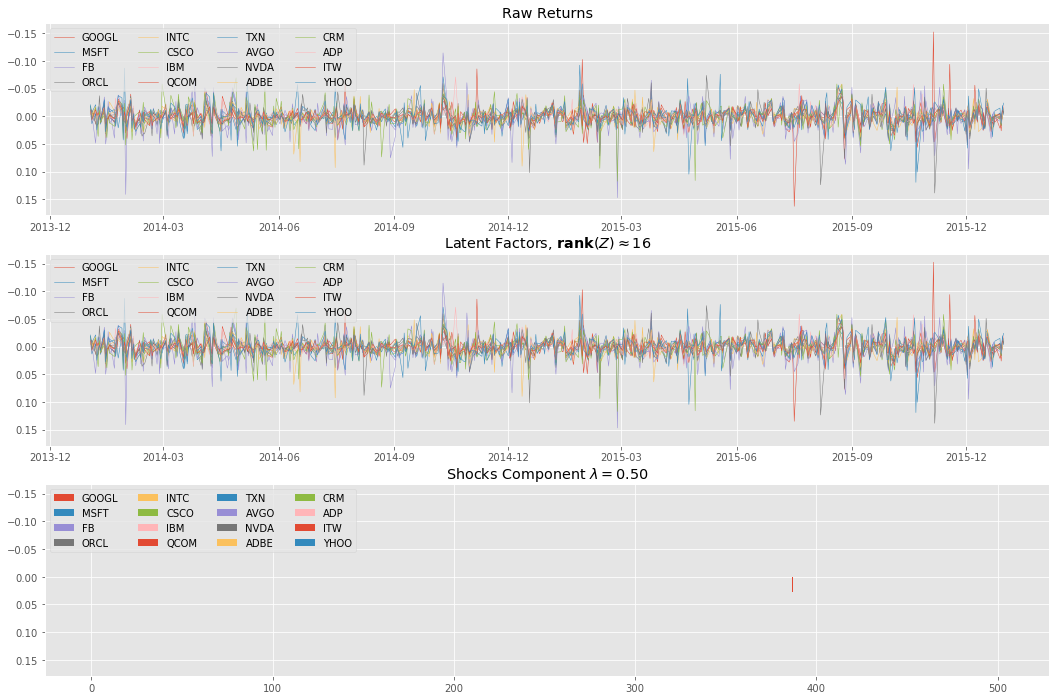

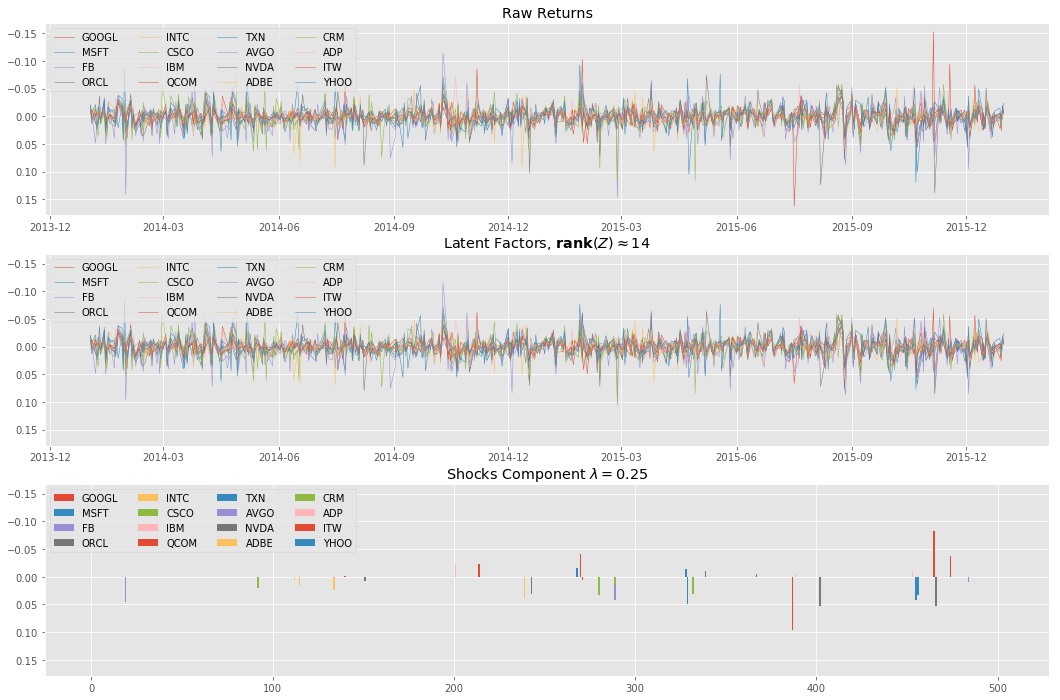

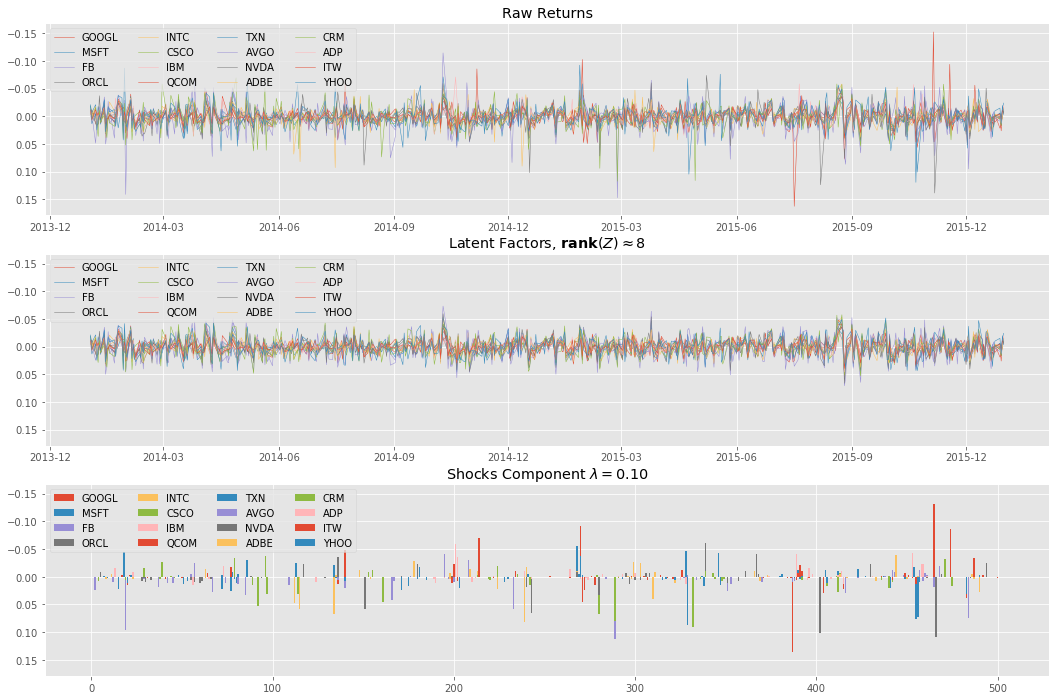

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

yrange = (1.1*data.values.max(), 1.1*data.values.min())

for lamb in (.5, .25, .1):
    
    Z, S = robustPCA(data.as_matrix(), lamb)
    
    plt.figure(figsize=(18, 12))

    # raw data

    plt.subplot(3, 1, 1)
    for company in data:
        plt.plot(data[company], label=company, linewidth=.5)
    plt.title('Raw Returns')
    plt.legend(loc='upper left', ncol=4)
    plt.ylim(yrange)

    # low rank

    plt.subplot(3, 1, 2)
    for col_num, company in enumerate(data):
        plt.plot(
            data.index, Z[:,col_num], linewidth=.5,
                label=company
        )
    plt.title(
        r'Latent Factors, $\mathbf{rank}(Z) \approx %i$' % approxRank(Z)
    )
    plt.legend(loc='upper left', ncol=4)
    plt.ylim(yrange)

    # sparse

    plt.subplot(3, 1, 3)
    S = np.array(S) # plt can't handle matrices, wants arrays
    grid = np.arange(S.shape[0])
    for col_num, company in enumerate(data):
        plt.bar(grid, S[:, col_num], label=company)

    plt.title(r'Shocks Component $\lambda = %.2f$' % lamb)
    plt.legend(loc='upper left', ncol=4)
    plt.ylim(yrange)

    # plt.tight_layout()
    plt.show()

### G. Interpreting the Results

How can you interpret the decomposition obatined via robust PCA in terms of idiosyncratic and systematic risk, specifically in the context of the tech sector? Do some additional research on the largest few shocks in the sparse component $S$; what happened those days?

### SOLUTION.

Low rank part $Z$ captures general trend in technology space while $S$ captures idiosyncratic performance related to special events like company releases. A few major events that end up as shocks in 2014, for example, include:

1. [Facebook 10-year anniversary](https://www.theguardian.com/news/datablog/2014/feb/04/facebook-in-numbers-statistics)

2. [Princeton researchers say Facebook will lose 80% of its users by 2017](https://www.theguardian.com/technology/2014/jan/22/facebook-princeton-researchers-infectious-disease)

3. [Cisco beats Q2 Expectations](https://www.recode.net/2014/2/12/11623416/cisco-q2-beats-diminished-street-expectations)

4. [Broadcom (AVGO) announces a 802.11ac chip for faster wifi](https://www.cnet.com/news/broadcom-unveils-new-802-11ac-chips-designed-for-significantly-better-wi-fi-experiece/)

# 3. Matrix Completion

In asset pricing and economics, it's common to obtain statistical quantities, such as covariance, via [structural equations and modeling](https://en.wikipedia.org/wiki/Structural_estimation). (This is to be compared with [reduced-form estimation](https://en.wikipedia.org/wiki/Reduced_form), in which statistical quantities are typically obtained directly by solving a system of equations.) As such, there are instances in which a set of structural equations is intractable due to unobservable quantities or limitations on the availability of data.

In this exercise, we will use matrix completion to fill in the missing entries of a partially-observed asset covariance matrix obtained via structural estimation.

### A. Exact Matrix Completion

The array `Sigma` below denotes the partially-observed covariance matrix of five assets' returns.

In [4]:
Sigma = np.array(
      [[  453.,   -36.,    -2.,np.nan, np.nan],
       [  -36., np.nan, np.nan,   20.,    96.],
       [   -2., np.nan,   105.,np.nan,    63.],
       [np.nan,    20., np.nan,  131.,   119.],
       [np.nan,    96.,    63.,  119., np.nan]]
)

Fill in the missing entries using the [original matrix completion algorithm](https://en.wikipedia.org/wiki/Matrix_completion#Convex_relaxation) and `print` the solution. What is the approximate rank of the completed matrix? What does this say about the assets?

### SOLUTION.

We'll start by solving the matrix completion problem.

In [5]:
n = Sigma.shape[0]
Omega = np.argwhere(~np.isnan(Sigma)) # observed indices

SigmaHat = cvx.Semidef(n)
objective = cvx.Minimize(cvx.norm(SigmaHat, 'nuc'))
constraints = [
    SigmaHat[i, j] == Sigma[i, j] for i,j in Omega
]

pstar = cvx.Problem(objective, constraints).solve(solver='SCS')

print(SigmaHat.value)

[[ 453.00681023  -36.00225354   -1.99277418    4.54311508  -32.57113603]
 [ -36.00225354   80.81605901   25.1414902    19.98401833   95.96367837]
 [  -1.99277418   25.1414902   105.05802201   50.12712846   63.01371976]
 [   4.54311508   19.98401833   50.12712846  131.02878015  118.99808264]
 [ -32.57113603   95.96367837   63.01371976  118.99808264  185.8477151 ]]


Next we'll check the approximate rank:

In [6]:
print('Approximate Rank: %i.' % approxRank(SigmaHat.value))

Approximate Rank: 4.


which suggests that the recovered covariance is nearly full-rank. This supports the claim that, in all likelihood, the assets do not exhibit highly synchronous linear comovements with each other (otherwise the covariance would be approximately low-rank).

### B. Matrix Completion with Uncertainty Bounds

In practice, even the observed entries of the covariance `Sigma` may not be known exactly. Instead of filling in the missing entries exactly, consider solving the problem

$$\min_{\hat{\Sigma}} \left\|\hat{\Sigma}\right\|_* \text{ subject to } \forall (i,j) \in \Omega: \Sigma^{(L)}_{ij} \leq \hat{\Sigma}_{ij} \leq \Sigma^{(U)}_{ij}$$

where $\Omega$ is the set of indices corresponding to observed entries of $\Sigma$ and $\left[\Sigma^{(L)}_{ij}, \Sigma^{(U)}_{ij}\right]$ can be taken as a non-empty confidence set for $\Sigma_{ij}$. We will refer to this problem generally as _matrix completion with uncertainty bounds_.

Show that for a fixed $\Sigma$, the minimum (i.e. the nuclear norm of the solution) of matrix completion with uncertainty bounds is upper-bounded by the minimum of the exact matrix completion problem. Next, provided below are arrays `Sigma_L` and `Sigma_U` characterizing lower and upper bounds on the observed entries of $\Sigma$.

In [11]:
Sigma_L = np.array(
      [[  45.83,  -59.4 ,   -3.3 , np.nan, np.nan],
       [ -59.4 ,  np.nan,  np.nan,    2.2,  10.56],
       [  -3.3 ,  np.nan,   11.55, np.nan,   6.93],
       [ np.nan,    2.2 ,  np.nan,  14.41,  13.09],
       [ np.nan,   10.56,    6.93,  13.09, np.nan]]
)

Sigma_U = np.array(
      [[ 498.,   -4.,     -0.,np.nan,np.nan],
       [  -4., np.nan, np.nan,   22.,  106.],
       [  -0., np.nan,   116.,np.nan,   69.],
       [np.nan,   22., np.nan,  144.,  131.],
       [np.nan,  106.,    69.,  131.,np.nan]]
)

Fill in the missing entries by solving the matrix completion with uncertainty bounds problem and print the solution. What is the rank of completed matrix? What are the limitations of this heuristic?

### SOLUTION.

Because the constraints in this version of the matrix completion problem contain the equality constraints of the previous part as a special case, the feasible region in this problem is at least as large. Therefore, the minimum is upper bounded by the minimum of the original matrix completion problem.

Next, we'll solve the program to recover a covariance:

In [12]:
constraints = []
for i,j in Omega:
    constraints.append(Sigma_L[i, j] <= SigmaHat[i, j])
    constraints.append(Sigma_U[i, j] >= SigmaHat[i, j])

pstar = cvx.Problem(objective, constraints).solve(solver='SCS')

print(SigmaHat.value)

[[ 45.83573185  -4.24572451  -3.15492868  -5.53430511  -5.38203356]
 [ -4.24572451   8.35050683   5.59459611  10.48910105  10.52916521]
 [ -3.15492868   5.59459611  11.5309099    7.23032799   6.93423319]
 [ -5.53430511  10.48910105   7.23032799  14.31534645  13.22279043]
 [ -5.38203356  10.52916521   6.93423319  13.22279043  13.22798323]]


and check the approximate rank

In [13]:
print('Approximate Rank: 3.' % approxRank(SigmaHat.value))

Approximate Rank: 3.


We can see that the rank is 3, which is lower than that of the covariance recovered in part A, which was full-rank. Additionally, we notice that many of the observed entries were reduced in magnitude or changed in some way or another.

This heuristic is useful when a low-rank option is acceptable. However, it can be limiting due to the fact that the rank of the data may not have a meaning or may not in fact be low.